### Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
print("Libraries imported")

Libraries imported


### Importing the 2d PCA data for visualization

In [4]:
df = pd.read_csv("data/pca_data.csv")

### Graphing the inertia vs clusters to find the elbow

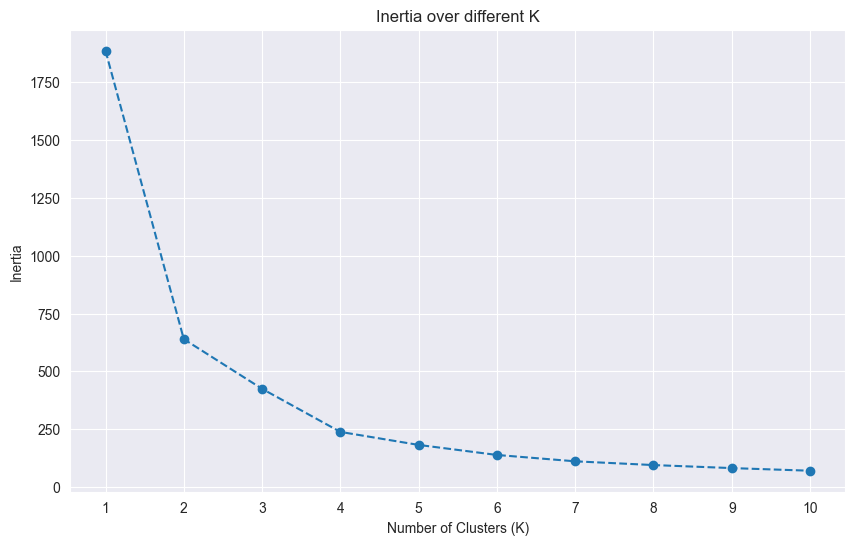

In [5]:
df_pca = df.drop("target", axis=1)
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Inertia over different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Observation: the elbow is at 2 and 4 is still a good option

### Plotting the dendrogram to check for the longest vertical line

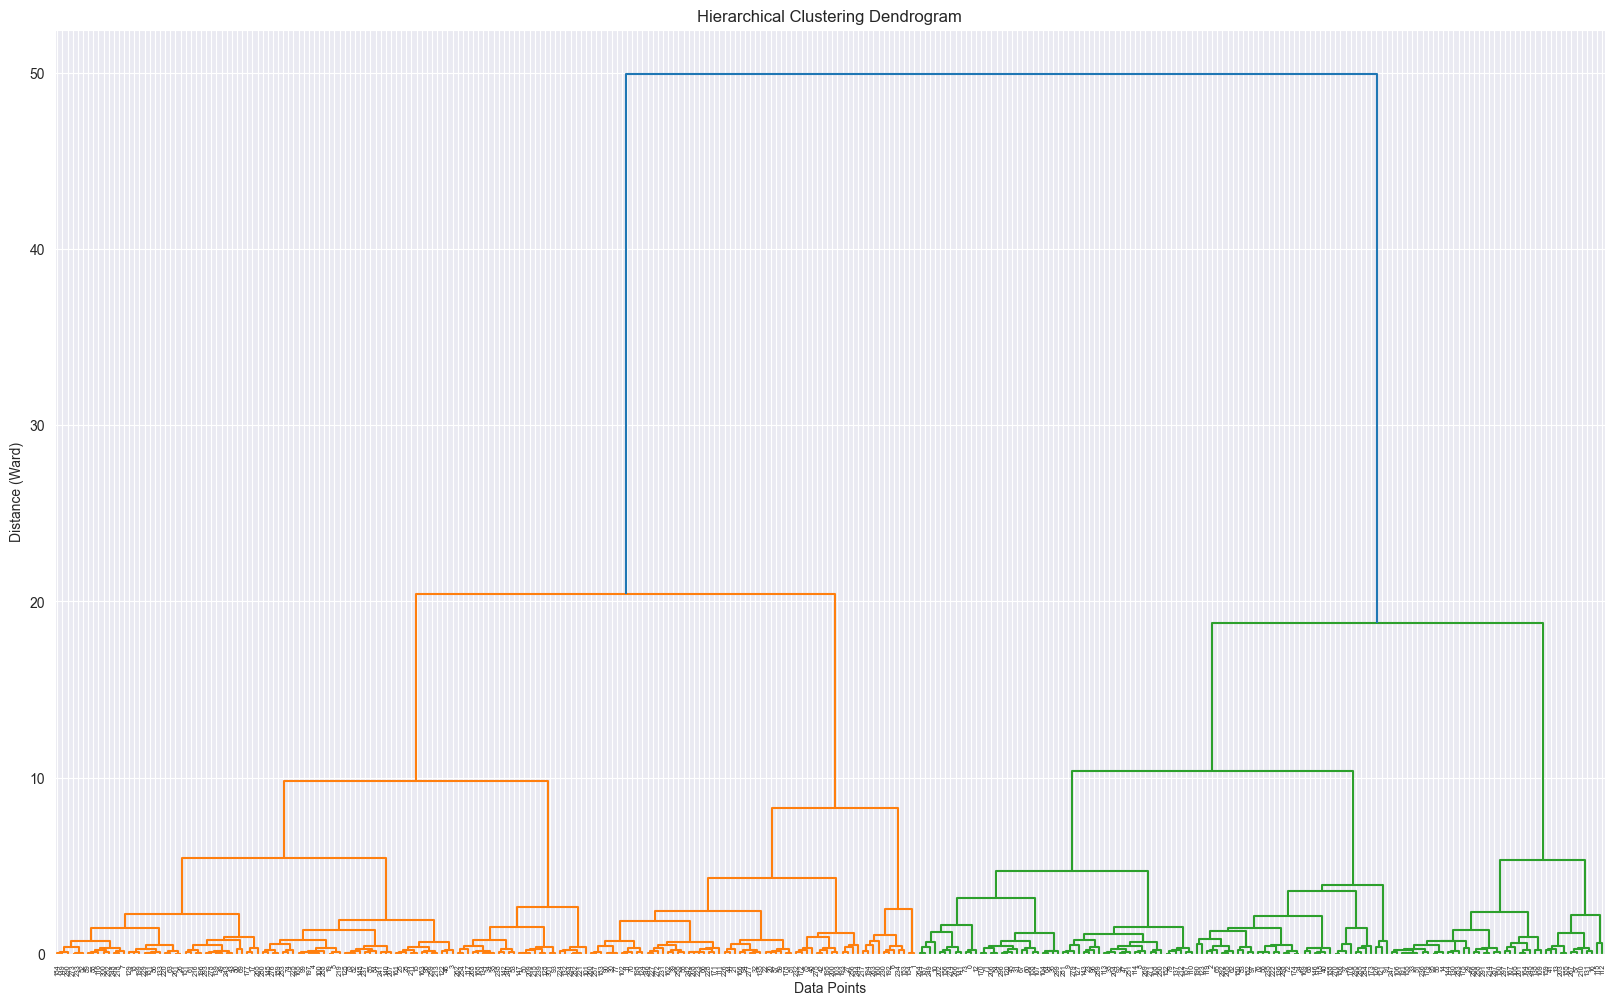

In [6]:
linked = linkage(df_pca[['PC1', 'PC2']], method='ward')


plt.figure(figsize=(20, 12))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance (Ward)')
plt.show()

Observation: 21~49 intersects only two vertical lines suggesting 2 is the optimal number since it is the greatest distance

### visualizing the clusters

In [7]:
df_pca = pd.read_csv("data/pca_data.csv")
df_pca.target = df_pca['target'].apply(lambda x: 1 if x >=1 else 0)

from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_pca['kmeans_cluster'] = kmeans.fit_predict(df_pca)

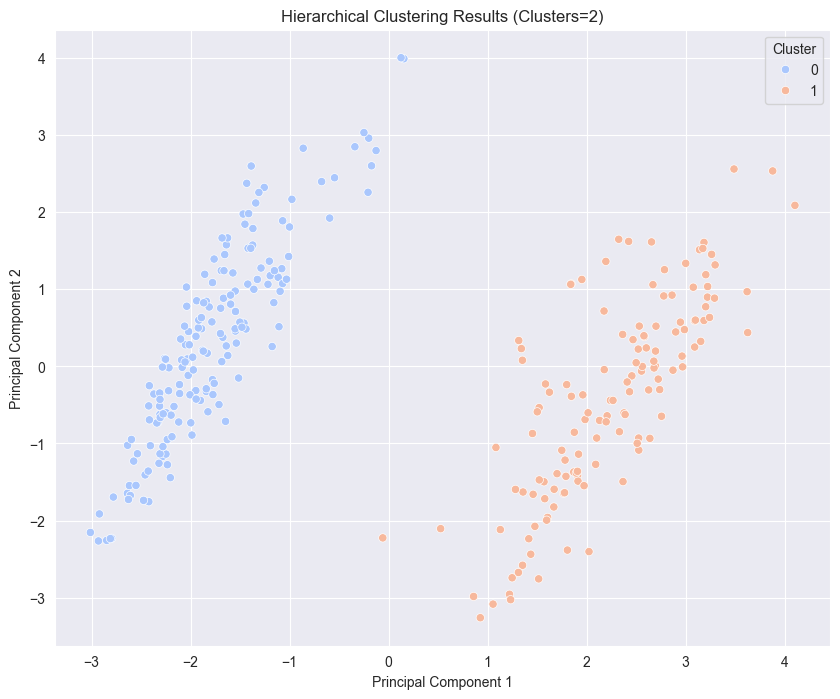

In [8]:

agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(df_pca[['PC1', 'PC2']])

# Add the hierarchical cluster labels to our PCA DataFrame
df_pca['agg_cluster'] = agg_labels


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='agg_cluster', data=df_pca, palette='coolwarm')
plt.title(f'Hierarchical Clustering Results (Clusters={2})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Comparison using the rand index for the 2d PCA

In [9]:
print("--- K-Means Clustering vs. Actual Labels ---")
kmeans_crosstab = pd.crosstab(df_pca['kmeans_cluster'], df_pca['target'])
print(kmeans_crosstab)
kmeans_ari = adjusted_rand_score(df_pca['target'], df_pca['kmeans_cluster'])
print(f"\nAdjusted Rand Index (K-Means): {kmeans_ari:.4f}\n")


print("--- Hierarchical Clustering vs. Actual Labels ---")
agg_crosstab = pd.crosstab(df_pca['agg_cluster'], df_pca['target'])
print(agg_crosstab)
agg_ari = adjusted_rand_score(df_pca['target'], df_pca['agg_cluster'])
print(f"\nAdjusted Rand Index (Hierarchical): {agg_ari:.4f}")

--- K-Means Clustering vs. Actual Labels ---
target            0    1
kmeans_cluster          
0                33  101
1               130   38

Adjusted Rand Index (K-Means): 0.2783

--- Hierarchical Clustering vs. Actual Labels ---
target         0    1
agg_cluster          
0            130   38
1             33  101

Adjusted Rand Index (Hierarchical): 0.2783


Observation: the clusters don't align well with the 2 pca data, will retry with 9 pca to check

### making PCA with 9 to be more accurate

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

print("Libraries imported")
### Loading Preprocessed data
df = pd.read_csv('data/heart_disease.csv')
X = df.drop(columns='num')
y = df['num']
print("Data loaded")
print(df.describe())
pca = PCA(n_components=9)
PCA_9 = pca.fit_transform(X)
df_pca = pd.DataFrame(PCA_9, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'])
df_pca['target'] = y
df_pca

Libraries imported
Data loaded
               ca        thal         age         sex          cp    trestbps  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.665563    4.715232   -0.004609    0.682119    3.158940    0.003145   
std      0.935142    1.937143    1.000093    0.466426    0.961676    1.001817   
min      0.000000    3.000000   -2.819115    0.000000    1.000000   -2.145037   
25%      0.000000    3.000000   -0.713556    0.000000    3.000000   -0.665300   
50%      0.000000    3.000000    0.117585    1.000000    3.000000   -0.096170   
75%      1.000000    7.000000    0.727089    1.000000    4.000000    0.472960   
max      3.000000    7.000000    2.500191    1.000000    4.000000    3.887739   

             chol         fbs     restecg     thalach       exang     oldpeak  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    -0.020326    0.149007    0.986755   -0.001507    0.327815   -0.001601

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,target
0,1.314511,0.334766,1.706967,-1.429655,1.470049,-0.943629,0.517257,1.405861,0.502072,0
1,0.153872,3.988126,-0.326920,0.067674,-0.321581,-0.167928,-0.002545,-0.947527,-1.290305,2
2,3.222902,1.034824,-0.930228,0.416073,0.329648,-0.873402,0.740899,-0.131330,0.662632,1
3,-1.647549,-0.713451,-0.308438,-0.933294,1.950283,2.626338,1.268712,-0.141556,0.457135,0
4,-2.310924,-0.624653,0.589144,0.028543,1.797940,-0.179325,0.420585,-0.173307,-0.240584,0
...,...,...,...,...,...,...,...,...,...,...
297,1.416026,-2.235360,0.051274,-0.724480,-0.015801,-0.210064,0.913797,2.388326,-0.910534,1
298,3.242080,0.633813,-0.511217,-1.707891,-0.292292,0.134634,0.783021,-1.195630,0.856245,2
299,2.638952,-0.933755,-1.727993,-1.334257,-0.129186,-0.953237,-0.839116,-0.771329,-0.251754,3
300,-2.061662,0.520959,0.929153,0.261001,0.329572,-1.023382,0.665663,-0.102630,0.209709,1


In [13]:
kmeans = KMeans(n_clusters=4, random_state=30, n_init=10)
df_pca['kmeans_cluster'] = kmeans.fit_predict(df_pca.drop('target', axis=1))

agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(df_pca.drop('target', axis=1))

df_pca['agg_cluster'] = agg_labels



In [14]:
print("--- K-Means Clustering vs. Actual Labels ---")
kmeans_crosstab = pd.crosstab(df_pca['kmeans_cluster'], df_pca['target'])
print(kmeans_crosstab)
kmeans_ari = adjusted_rand_score(df_pca['target'], df_pca['kmeans_cluster'])
print(f"\nAdjusted Rand Index (K-Means): {kmeans_ari:.4f}\n")


print("--- Hierarchical Clustering vs. Actual Labels ---")
agg_crosstab = pd.crosstab(df_pca['agg_cluster'], df_pca['target'])
print(agg_crosstab)
agg_ari = adjusted_rand_score(df_pca['target'], df_pca['agg_cluster'])
print(f"\nAdjusted Rand Index (Hierarchical): {agg_ari:.4f}")

--- K-Means Clustering vs. Actual Labels ---
target           0   1   2   3  4
kmeans_cluster                   
0               91   6   2   0  0
1               29  21  11  10  2
2                4  12  17  19  9
3               39  16   6   6  2

Adjusted Rand Index (K-Means): 0.2093

--- Hierarchical Clustering vs. Actual Labels ---
target        0   1   2   3  4
agg_cluster                   
0            91   6   2   0  0
1             3  11  19  19  8
2            39  16   6   6  2
3            30  22   9  10  3

Adjusted Rand Index (Hierarchical): 0.2135


observation: not a bigger improvement over 2D